### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## get top 200meter mean of phytoplankters for the 4 datasets

In [4]:
extract = False
if extract:
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
    w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-phyto-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-phyto-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_CO2a-phyto-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-phyto-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-phyto-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_ECOa-phyto-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-phyto-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-phyto-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-phyto-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-phyto-dint-2018-2022_regrid.nc')

In [5]:
variables = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']
tdir = '/gpfs/data/greenocean/software/runs/regridded/'

RW_CO2a_dint = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-phyto-dint-2018-2022_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [RW_CO2a_dint[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
RW_CO2a_dint['biomax'] = biomax
RW_CO2a_dint['biomax'] = RW_CO2a_dint['biomax'].where(RW_CO2a_dint['MIX'] != 0)

RW_ECOa_dint = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-phyto-dint-2018-2022_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [RW_ECOa_dint[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
RW_ECOa_dint['biomax'] = biomax
RW_ECOa_dint['biomax'] = RW_ECOa_dint['biomax'].where(RW_ECOa_dint['MIX'] != 0)

TJ_CA02_dint = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dint-2018-2022_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_CA02_dint[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_CA02_dint['biomax'] = biomax
TJ_CA02_dint['biomax'] = TJ_CA02_dint['biomax'].where(TJ_CA02_dint['MIX'] != 0)

TJ_EA02_dint = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dint-2018-2022_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_EA02_dint[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_EA02_dint['biomax'] = biomax
TJ_EA02_dint['biomax'] = TJ_EA02_dint['biomax'].where(TJ_EA02_dint['MIX'] != 0)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


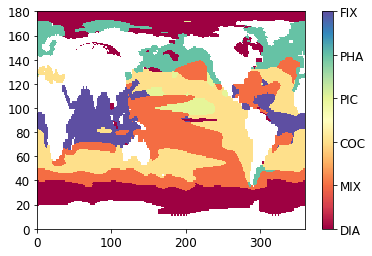

In [6]:
w = plt.pcolormesh(TJ_EA02_dint.biomax.values, cmap = 'Spectral')
cbar = plt.colorbar(w)
cbar.set_ticks(np.arange(1,7))
cbar.set_ticklabels(['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX'])

In [7]:
def print_var_values_at_indices(ds, x, y):
    """
    Print the values of variables var1 to var6 at the given indices (x, y) in the dataset.

    Parameters:
    - ds: xarray.Dataset containing the variables.
    - x: Index along the first dimension.
    - y: Index along the second dimension.
    """
    # List of variable names to print values for
    var_names = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']
    values = {}

    # Iterate through each variable to print its value and store it for comparison
    for var_name in var_names:
        if var_name in ds:
            value = ds[var_name].isel({ds[var_name].dims[0]: y, ds[var_name].dims[1]: x}).values.item()
            values[var_name] = value
            print(f"Value of {var_name} at indices ({x}, {y}): {value}")
        else:
            print(f"Variable {var_name} not found in dataset.")

    # Identify and print the variable with the largest value at the specified indices
    if values:
        max_var = max(values, key=values.get)
        max_value = values[max_var]
        print(f"The largest value at indices ({x}, {y}) is {max_value}, from variable {max_var}.")
    else:
        print("No variables found or all variables are missing at the specified indices.")

            
print_var_values_at_indices(TJ_EA02_dint,200,50)

Value of DIA at indices (200, 50): 3.9420651631871806e-08
Value of MIX at indices (200, 50): 5.1851550608716934e-08
Value of COC at indices (200, 50): 3.465883935405145e-07
Value of PIC at indices (200, 50): 2.3193575948710077e-09
Value of PHA at indices (200, 50): 2.424352663066287e-10
Value of FIX at indices (200, 50): 2.2039914338023436e-09
The largest value at indices (200, 50) is 3.465883935405145e-07, from variable COC.


In [8]:
def add_map(lons, lats, tp, tax, vmin = 0, vmax = 1e-5, tit = 'tit', r = 1, c = 2, tcmap = 'Spectral_r'):
    ax1 = fig.add_subplot(r, c, tax, projection=ccrs.Robinson(central_longitude=-50.0), )
    #ax1.add_feature(cfeature.LAND)
    q = ax1.pcolormesh(lons, lats, tp,transform=ccrs.PlateCarree(), 
                       cmap = tcmap, vmin = vmin, vmax = vmax, zorder = 0)
    cbar = fig.colorbar(q, ax = ax1, orientation = 'horizontal', shrink = 0.6, aspect=20, pad=0.042)
    ax1.add_feature(cfeature.LAND, zorder = 1)
    ax1.set_title(tit)


In [9]:
lons = TJ_EA02_dint['lon']
lats = TJ_EA02_dint['lat']

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


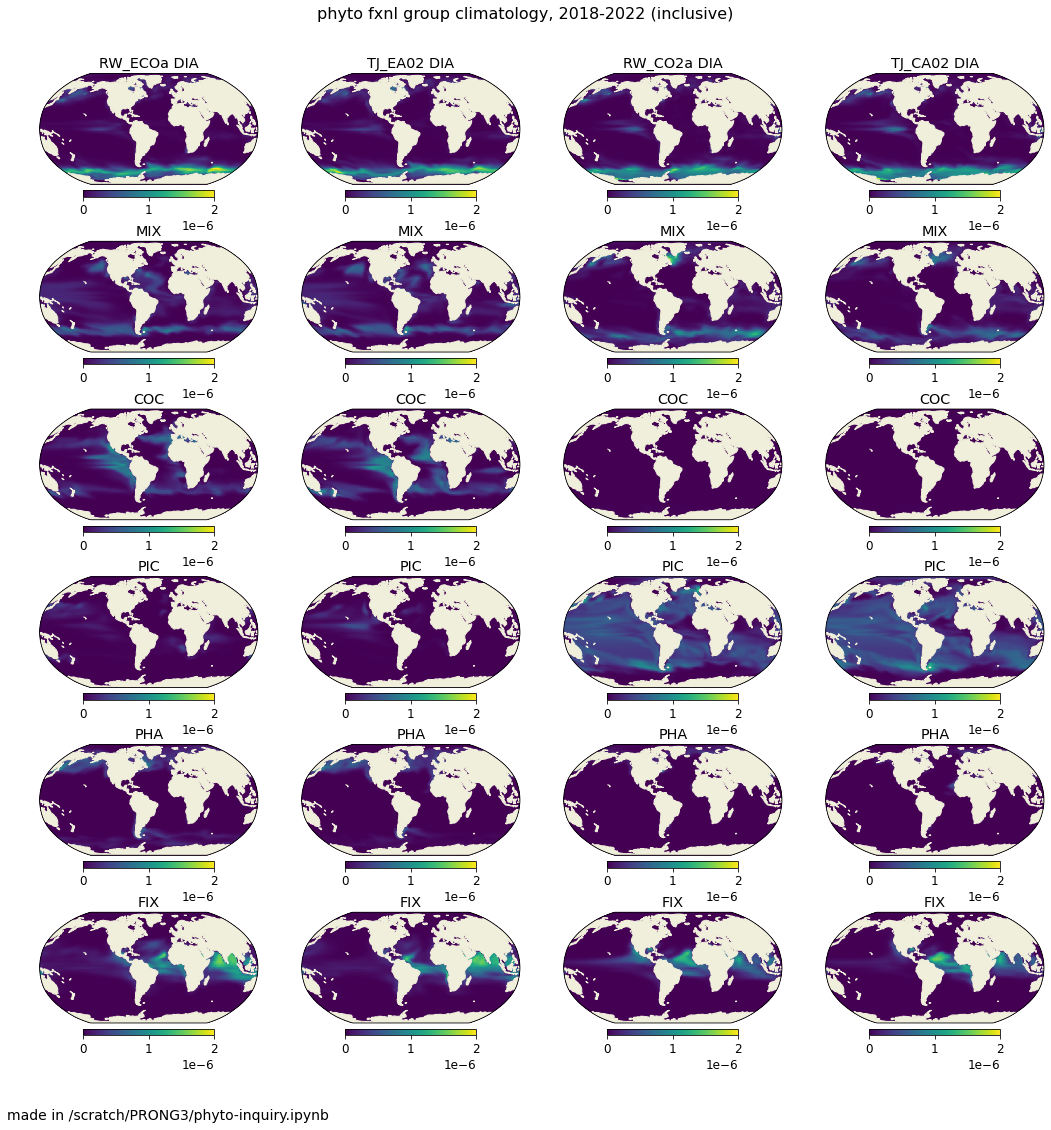

In [10]:
var_names = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

def make_phytoplot(ds,ind,tvmin,tvmax, tit1):

    add_map(lons, lats, ds.DIA, ind, vmin = tvmin, vmax = tvmax, tit = tit1, r = 6, c = 4, tcmap = 'viridis')
    tit = 'MIX'; 
    add_map(lons, lats, ds.MIX, ind+4, vmin = tvmin, vmax = tvmax, tit = tit, r = 6, c = 4, tcmap = 'viridis')
    tit = 'COC'; 
    add_map(lons, lats, ds.COC, ind+4*2, vmin = tvmin, vmax = tvmax, tit = tit, r = 6, c = 4, tcmap = 'viridis')
    tit = 'PIC'; 
    add_map(lons, lats, ds.PIC, ind+4*3, vmin = tvmin, vmax = tvmax, tit = tit, r = 6, c = 4, tcmap = 'viridis')
    tit = 'PHA'; 
    add_map(lons, lats, ds.PHA, ind+4*4, vmin = tvmin, vmax = tvmax, tit = tit, r = 6, c = 4, tcmap = 'viridis')
    tit = 'FIX'; 
    add_map(lons, lats, ds.FIX, ind+4*5, vmin = tvmin, vmax = tvmax, tit = tit, r = 6, c = 4, tcmap = 'viridis')


fig = plt.figure(figsize=(18, 18))
fig.text(0.1,0.071,'made in /scratch/PRONG3/phyto-inquiry.ipynb', fontsize = 14)
savenam = './figs/FxlGroups_2018-2022clim.jpg'
save = True

tvmin = 0; tvmax = 2e-6
cvmin = -1e-6; cvmax = 1e-6

ds = RW_ECOa_dint; tit1 = 'RW_ECOa DIA'; ind = 1
make_phytoplot(ds,ind,tvmin,tvmax, tit1)

ds = TJ_EA02_dint; tit1 = 'TJ_EA02 DIA'; ind = 2
make_phytoplot(ds,ind,tvmin,tvmax, tit1)

ds = RW_CO2a_dint; tit1 = 'RW_CO2a DIA'; ind = 3
make_phytoplot(ds,ind,tvmin,tvmax, tit1)

ds = TJ_CA02_dint; tit1 = 'TJ_CA02 DIA'; ind = 4
make_phytoplot(ds,ind,tvmin,tvmax, tit1)

plt.tight_layout()

# tit = 'TJ_EA02 TChl \n depth = 0, 2018-2022 (ECO-UKESM)'
# add_map(lons, lats, TJ_EA02_fr_TChl, 2, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
# tit = 'RW_ECOa-TJ_EA02'
# add_map(lons, lats, RW_ECOa_fr_TChl-TJ_EA02_fr_TChl, 3, \
#         vmin = cvmin, vmax = cvmax, tit = tit,\
#         r = 2, c = 3, tcmap = cm.balance)

# tit = 'RW_CO2a TChl \n depth = 0, 2018-2022 (CO2-ERA)'
# add_map(lons, lats, RW_CO2a_fr_TChl, 4, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
# tit = 'TJ_CA02 TChl \n depth = 0, 2018-2022 (CO2-UKESM)'
# add_map(lons, lats, TJ_CA02_fr_TChl, 5, vmin = tvmin, vmax = tvmax, tit = tit, r = 2, c = 3)
# tit = 'RW_CO2a-TJ_CA02'
# add_map(lons, lats, RW_CO2a_fr_TChl-TJ_CA02_fr_TChl, 6, \
#         vmin = cvmin, vmax = cvmax, tit = tit,\
#         r = 2, c = 3, tcmap = cm.balance)
plt.suptitle('phyto fxnl group climatology, 2018-2022 (inclusive)', fontsize = 16, y = 0.93)
if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)



## dominance

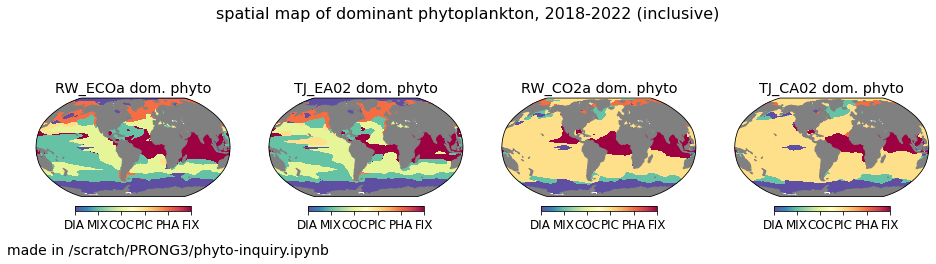

In [11]:
# w = plt.pcolormesh(TJ_EA02_dint.biomax.values, cmap = 'Spectral')
# cbar = plt.colorbar(w)
# cbar.set_ticks(np.arange(1,7))
# cbar.set_ticklabels(['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX'])

def add_map_dom(lons, lats, tp, tax, vmin = 1, vmax = 6, tit = 'tit', r = 1, c = 2, tcmap = 'Spectral_r'):
    ax1 = fig.add_subplot(r, c, tax, projection=ccrs.Robinson(central_longitude=-50.0), )
    #ax1.add_feature(cfeature.LAND)
    q = ax1.pcolormesh(lons, lats, tp,transform=ccrs.PlateCarree(), 
                       cmap = tcmap, vmin = vmin, vmax = vmax, zorder = 0)
    cbar = fig.colorbar(q, ax = ax1, orientation = 'horizontal', shrink = 0.6, aspect=20, pad=0.042)
    cbar.set_ticks(np.arange(1,7))
    cbar.set_ticklabels(['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX'])
    ax1.add_feature(cfeature.LAND, zorder = 1, color = 'grey')
    ax1.set_title(tit)

fig = plt.figure(figsize=(16, 4))
fig.text(0.1,0.071,'made in /scratch/PRONG3/phyto-inquiry.ipynb', fontsize = 14)
savenam = './figs/Dominance_2018-2022clim.jpg'
save = True
tit = 'RW_ECOa dom. phyto'
add_map_dom(lons,lats,RW_ECOa_dint.biomax,1,r=1,c=4, tit = tit)
tit = 'TJ_EA02 dom. phyto'
add_map_dom(lons,lats,TJ_EA02_dint.biomax,2,r=1,c=4, tit = tit)
tit = 'RW_CO2a dom. phyto'
add_map_dom(lons,lats,RW_CO2a_dint.biomax,3,r=1,c=4, tit = tit)
tit = 'TJ_CA02 dom. phyto'
add_map_dom(lons,lats,TJ_CA02_dint.biomax,4,r=1,c=4, tit = tit)


plt.suptitle('spatial map of dominant phytoplankton, 2018-2022 (inclusive)', fontsize = 16, y = 0.93)

if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)

    

## dominance, past and future

In [12]:
extract = False
if extract:
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
#     w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-phyto-dall-2078-2082_regrid.nc')
#     wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
#     RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
#     RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-phyto-dint-2078-2082_regrid.nc')
#     print(f'{tdir}TOM12_RW_CO2a-phyto-dint-2078-2082_regrid.nc')
    
#     w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-phyto-dall-2078-2082_regrid.nc')
#     wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
#     RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
#     RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-phyto-dint-2078-2082_regrid.nc')
#     print(f'{tdir}TOM12_RW_ECOa-phyto-dint-2078-2082_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dall-2078-2082_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-phyto-dint-2078-2082_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-phyto-dint-2078-2082_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dall-2078-2082_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-phyto-dint-2078-2082_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-phyto-dint-2078-2082_regrid.nc')

In [13]:
extract = False
if extract:
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
    w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-phyto-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-phyto-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_RW_CO2a-phyto-dint-1948-1952_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-phyto-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-phyto-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_RW_ECOa-phyto-dint-1948-1952_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-phyto-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-phyto-dint-1948-1952_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-phyto-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-phyto-dint-1948-1952_regrid.nc')

In [14]:
variables = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

TJ_CA02_dint2078 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dint-2078-2082_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_CA02_dint2078[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_CA02_dint2078['biomax'] = biomax
TJ_CA02_dint2078['biomax'] = TJ_CA02_dint2078['biomax'].where(TJ_CA02_dint2078['MIX'] != 0)

TJ_EA02_dint2078 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dint-2078-2082_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_EA02_dint2078[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_EA02_dint2078['biomax'] = biomax
TJ_EA02_dint2078['biomax'] = TJ_EA02_dint2078['biomax'].where(TJ_EA02_dint2078['MIX'] != 0)

TJ_CA02_dint2078 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dint-2078-2082_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_CA02_dint2078[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_CA02_dint2078['biomax'] = biomax
TJ_CA02_dint2078['biomax'] = TJ_CA02_dint2078['biomax'].where(TJ_CA02_dint2078['MIX'] != 0)

TJ_EA02_dint2078 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dint-2078-2082_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_EA02_dint2078[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_EA02_dint2078['biomax'] = biomax
TJ_EA02_dint2078['biomax'] = TJ_EA02_dint2078['biomax'].where(TJ_EA02_dint2078['MIX'] != 0)

In [15]:
variables = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

TJ_CA02_dint1948 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_CA02_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_CA02_dint1948['biomax'] = biomax
TJ_CA02_dint1948['biomax'] = TJ_CA02_dint1948['biomax'].where(TJ_CA02_dint1948['MIX'] != 0)

TJ_EA02_dint1948 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_EA02_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_EA02_dint1948['biomax'] = biomax
TJ_EA02_dint1948['biomax'] = TJ_EA02_dint1948['biomax'].where(TJ_EA02_dint1948['MIX'] != 0)

TJ_CA02_dint1948 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_CA02_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_CA02_dint1948['biomax'] = biomax
TJ_CA02_dint1948['biomax'] = TJ_CA02_dint1948['biomax'].where(TJ_CA02_dint1948['MIX'] != 0)

TJ_EA02_dint1948 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [TJ_EA02_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
TJ_EA02_dint1948['biomax'] = biomax
TJ_EA02_dint1948['biomax'] = TJ_EA02_dint1948['biomax'].where(TJ_EA02_dint1948['MIX'] != 0)


variables = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

RW_CO2a_dint1948 = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [RW_CO2a_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
RW_CO2a_dint1948['biomax'] = biomax
RW_CO2a_dint1948['biomax'] = RW_CO2a_dint1948['biomax'].where(RW_CO2a_dint1948['MIX'] != 0)

RW_ECOa_dint1948 = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [RW_ECOa_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
RW_ECOa_dint1948['biomax'] = biomax
RW_ECOa_dint1948['biomax'] = RW_ECOa_dint1948['biomax'].where(RW_ECOa_dint1948['MIX'] != 0)

RW_CO2a_dint1948 = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [RW_CO2a_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
RW_CO2a_dint1948['biomax'] = biomax
RW_CO2a_dint1948['biomax'] = RW_CO2a_dint1948['biomax'].where(RW_CO2a_dint1948['MIX'] != 0)

RW_ECOa_dint1948 = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-phyto-dint-1948-1952_regrid.nc')
# Replace NaNs with a very small number before stacking
# This ensures NaNs are treated as the smallest possible values
filled = [RW_ECOa_dint1948[var].fillna(0) for var in variables]
# Stack the filled variables into a new dimension
stacked = xr.concat(filled, 'new_dim')
# Use argmax to find the index of the maximum value across 'new_dim'
# Since we replaced NaNs, we ensure they don't affect the result incorrectly
biomax = stacked.argmax(dim='new_dim') + 1
# Assign the result back to the original dataset, without the NaN replacement
RW_ECOa_dint1948['biomax'] = biomax
RW_ECOa_dint1948['biomax'] = RW_ECOa_dint1948['biomax'].where(RW_ECOa_dint1948['MIX'] != 0)

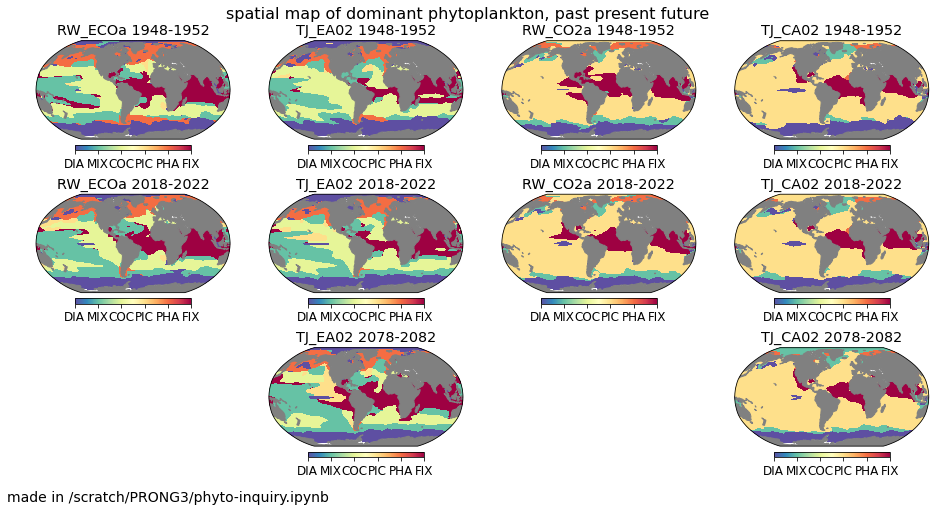

In [16]:
# w = plt.pcolormesh(TJ_EA02_dint.biomax.values, cmap = 'Spectral')
# cbar = plt.colorbar(w)
# cbar.set_ticks(np.arange(1,7))
# cbar.set_ticklabels(['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX'])

def add_map_dom(lons, lats, tp, tax, vmin = 1, vmax = 6, tit = 'tit', r = 1, c = 2, tcmap = 'Spectral_r'):
    ax1 = fig.add_subplot(r, c, tax, projection=ccrs.Robinson(central_longitude=-50.0), )
    #ax1.add_feature(cfeature.LAND)
    q = ax1.pcolormesh(lons, lats, tp,transform=ccrs.PlateCarree(), 
                       cmap = tcmap, vmin = vmin, vmax = vmax, zorder = 0)
    cbar = fig.colorbar(q, ax = ax1, orientation = 'horizontal', shrink = 0.6, aspect=20, pad=0.042)
    cbar.set_ticks(np.arange(1,7))
    cbar.set_ticklabels(['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX'])
    ax1.add_feature(cfeature.LAND, zorder = 1, color = 'grey')
    ax1.set_title(tit)

fig = plt.figure(figsize=(16, 8))
fig.text(0.1,0.071,'made in /scratch/PRONG3/phyto-inquiry.ipynb', fontsize = 14)
savenam = './figs/Dominance_2018-2022clim.jpg'
save = True

tit = 'RW_ECOa 1948-1952'
add_map_dom(lons,lats,RW_ECOa_dint1948.biomax,1,r=3,c=4, tit = tit)
tit = 'TJ_EA02 1948-1952'
add_map_dom(lons,lats,TJ_EA02_dint1948.biomax,2,r=3,c=4, tit = tit)
tit = 'RW_CO2a 1948-1952'
add_map_dom(lons,lats,RW_CO2a_dint1948.biomax,3,r=3,c=4, tit = tit)
tit = 'TJ_CA02 1948-1952'
add_map_dom(lons,lats,TJ_CA02_dint1948.biomax,4,r=3,c=4, tit = tit)

tit = 'RW_ECOa 2018-2022'
add_map_dom(lons,lats,RW_ECOa_dint.biomax,1+4,r=3,c=4, tit = tit)
tit = 'TJ_EA02 2018-2022'
add_map_dom(lons,lats,TJ_EA02_dint.biomax,2+4,r=3,c=4, tit = tit)
tit = 'RW_CO2a 2018-2022'
add_map_dom(lons,lats,RW_CO2a_dint.biomax,3+4,r=3,c=4, tit = tit)
tit = 'TJ_CA02 2018-2022'
add_map_dom(lons,lats,TJ_CA02_dint.biomax,4+4,r=3,c=4, tit = tit)

tit = 'TJ_EA02 2078-2082'
add_map_dom(lons,lats,TJ_EA02_dint2078.biomax,2+8,r=3,c=4, tit = tit)
tit = 'TJ_CA02 2078-2082'
add_map_dom(lons,lats,TJ_CA02_dint2078.biomax,4+8,r=3,c=4, tit = tit)


plt.suptitle('spatial map of dominant phytoplankton, past present future', fontsize = 16, y = 0.93)

if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)

    

### zoo inquiry

In [35]:
extract = False
if extract:
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
    w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-zoo-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-zoo-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_CO2a-zoo-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-zoo-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-zoo-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_RW_ECOa-zoo-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-zoo-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-zoo-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-zoo-dint-2018-2022_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-zoo-dall-2018-2022_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-zoo-dint-2018-2022_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-zoo-dint-2018-2022_regrid.nc')
    
### 40s
    tdir = '/gpfs/data/greenocean/software/runs/regridded/'
    w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-zoo-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-zoo-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_RW_CO2a-zoo-dint-1948-1952_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-zoo-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-zoo-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_RW_ECOa-zoo-dint-1948-1952_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-zoo-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-zoo-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-zoo-dint-1948-1952_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-zoo-dall-1948-1952_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-zoo-dint-1948-1952_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-zoo-dint-1948-1952_regrid.nc')
    
#     tdir = '/gpfs/data/greenocean/software/runs/regridded/'
#     w = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-zoo-dall-2078-2082_regrid.nc')
#     wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
#     RW_CO2a_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
#     RW_CO2a_dint.to_netcdf(f'{tdir}TOM12_RW_CO2a-zoo-dint-2078-2082_regrid.nc')
#     print(f'{tdir}TOM12_RW_CO2a-zoo-dint-2078-2082_regrid.nc')
    
#     w = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-zoo-dall-2078-2082_regrid.nc')
#     wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
#     RW_ECOa_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
#     RW_ECOa_dint.to_netcdf(f'{tdir}TOM12_RW_ECOa-zoo-dint-2078-2082_regrid.nc')
#     print(f'{tdir}TOM12_RW_ECOa-zoo-dint-2078-2082_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-zoo-dall-2078-2082_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_CA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_CA02_dint.to_netcdf(f'{tdir}TOM12_TJ_CA02-zoo-dint-2078-2082_regrid.nc')
    print(f'{tdir}TOM12_TJ_CA02-zoo-dint-2078-2082_regrid.nc')
    
    w = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-zoo-dall-2078-2082_regrid.nc')
    wmn = w.isel(deptht=slice(0,17)).mean(dim = ['time_counter'])
    TJ_EA02_dint = wmn.weighted(wmn.deptht.isel(deptht=slice(0,17))).mean(dim = ['deptht'])
    TJ_EA02_dint.to_netcdf(f'{tdir}TOM12_TJ_EA02-zoo-dint-2078-2082_regrid.nc')
    print(f'{tdir}TOM12_TJ_EA02-zoo-dint-2078-2082_regrid.nc')

In [36]:
tdir = '/gpfs/data/greenocean/software/runs/regridded/'

RW_CO2a_zoo2018 = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-zoo-dint-2018-2022_regrid.nc')
RW_ECOa_zoo2018 = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-zoo-dint-2018-2022_regrid.nc')
TJ_CA02_zoo2018 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-zoo-dint-2018-2022_regrid.nc')
TJ_EA02_zoo2018 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-zoo-dint-2018-2022_regrid.nc')

RW_CO2a_zoo1948 = xr.open_dataset(f'{tdir}TOM12_RW_CO2a-zoo-dint-1948-1952_regrid.nc')
RW_ECOa_zoo1948 = xr.open_dataset(f'{tdir}TOM12_RW_ECOa-zoo-dint-1948-1952_regrid.nc')
TJ_CA02_zoo1948 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-zoo-dint-1948-1952_regrid.nc')
TJ_EA02_zoo1948 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-zoo-dint-1948-1952_regrid.nc')

TJ_CA02_zoo2078 = xr.open_dataset(f'{tdir}TOM12_TJ_CA02-zoo-dint-2078-2082_regrid.nc')
TJ_EA02_zoo2078 = xr.open_dataset(f'{tdir}TOM12_TJ_EA02-zoo-dint-2078-2082_regrid.nc')

In [38]:
variables = ['PTE', 'MES', 'GEL', 'MAC', 'PRO' ]

filled = [RW_CO2a_zoo2018[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
RW_CO2a_zoo2018['biomax'] = biomax

filled = [RW_ECOa_zoo2018[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
RW_ECOa_zoo2018['biomax'] = biomax
#
filled = [TJ_CA02_zoo2018[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
TJ_CA02_zoo2018['biomax'] = biomax

filled = [TJ_EA02_zoo2018[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
TJ_EA02_zoo2018['biomax'] = biomax
###1948
filled = [RW_CO2a_zoo1948[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
RW_CO2a_zoo1948['biomax'] = biomax

filled = [RW_ECOa_zoo1948[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
RW_ECOa_zoo1948['biomax'] = biomax
#
filled = [TJ_CA02_zoo1948[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
TJ_CA02_zoo1948['biomax'] = biomax

filled = [TJ_EA02_zoo1948[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
TJ_EA02_zoo1948['biomax'] = biomax
###
#
filled = [TJ_CA02_zoo2078[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
TJ_CA02_zoo2078['biomax'] = biomax

filled = [TJ_EA02_zoo2078[var].fillna(0) for var in variables]
stacked = xr.concat(filled, 'new_dim'); biomax = stacked.argmax(dim='new_dim') + 1
TJ_EA02_zoo2078['biomax'] = biomax

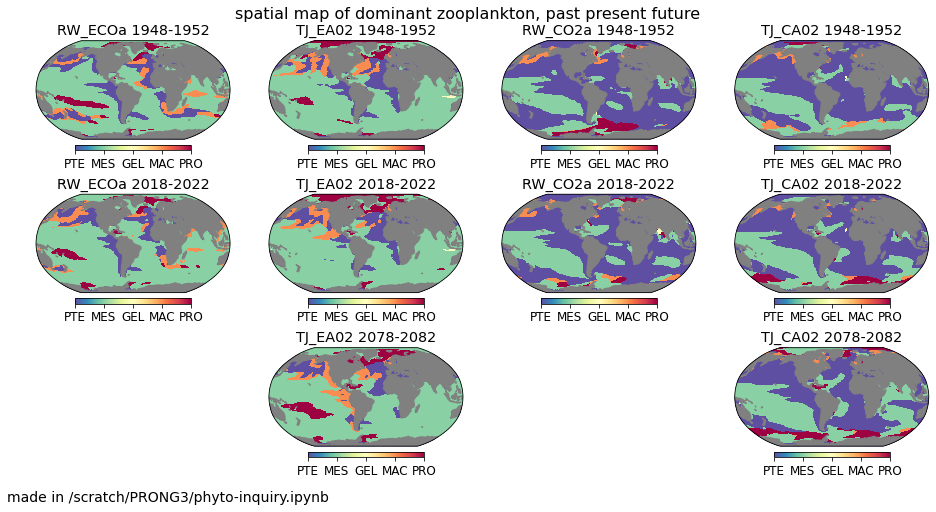

In [41]:
# w = plt.pcolormesh(TJ_EA02_dint.biomax.values, cmap = 'Spectral')
# cbar = plt.colorbar(w)
# cbar.set_ticks(np.arange(1,7))
# cbar.set_ticklabels(['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX'])

def add_map_domzoo(lons, lats, tp, tax, vmin = 1, vmax = 5, tit = 'tit', r = 1, c = 2, tcmap = 'Spectral_r'):
    ax1 = fig.add_subplot(r, c, tax, projection=ccrs.Robinson(central_longitude=-50.0), )
    #ax1.add_feature(cfeature.LAND)
    q = ax1.pcolormesh(lons, lats, tp,transform=ccrs.PlateCarree(), 
                       cmap = tcmap, vmin = vmin, vmax = vmax, zorder = 0)
    cbar = fig.colorbar(q, ax = ax1, orientation = 'horizontal', shrink = 0.6, aspect=20, pad=0.042)
    cbar.set_ticks(np.arange(1,6))
    cbar.set_ticklabels(['PTE', 'MES', 'GEL', 'MAC', 'PRO' ])
    ax1.add_feature(cfeature.LAND, zorder = 1, color = 'grey')
    ax1.set_title(tit)

fig = plt.figure(figsize=(16, 8))
fig.text(0.1,0.071,'made in /scratch/PRONG3/phyto-inquiry.ipynb', fontsize = 14)
savenam = './figs/zoodominance_2018-2022clim.jpg'
save = True

tit = 'RW_ECOa 1948-1952'
add_map_domzoo(lons,lats,RW_ECOa_zoo1948.biomax,1,r=3,c=4, tit = tit)
tit = 'TJ_EA02 1948-1952'
add_map_domzoo(lons,lats,TJ_EA02_zoo1948.biomax,2,r=3,c=4, tit = tit)
tit = 'RW_CO2a 1948-1952'
add_map_domzoo(lons,lats,RW_CO2a_zoo1948.biomax,3,r=3,c=4, tit = tit)
tit = 'TJ_CA02 1948-1952'
add_map_domzoo(lons,lats,TJ_CA02_zoo1948.biomax,4,r=3,c=4, tit = tit)

tit = 'RW_ECOa 2018-2022'
add_map_domzoo(lons,lats,RW_ECOa_zoo2018.biomax,1+4,r=3,c=4, tit = tit)
tit = 'TJ_EA02 2018-2022'
add_map_domzoo(lons,lats,TJ_EA02_zoo2018.biomax,2+4,r=3,c=4, tit = tit)
tit = 'RW_CO2a 2018-2022'
add_map_domzoo(lons,lats,RW_CO2a_zoo2018.biomax,3+4,r=3,c=4, tit = tit)
tit = 'TJ_CA02 2018-2022'
add_map_domzoo(lons,lats,TJ_CA02_zoo2018.biomax,4+4,r=3,c=4, tit = tit)

tit = 'TJ_EA02 2078-2082'
add_map_domzoo(lons,lats,TJ_EA02_zoo2078.biomax,2+8,r=3,c=4, tit = tit)
tit = 'TJ_CA02 2078-2082'
add_map_domzoo(lons,lats,TJ_CA02_zoo2078.biomax,4+8,r=3,c=4, tit = tit)


plt.suptitle('spatial map of dominant zooplankton, past present future', fontsize = 16, y = 0.93)

if save:
    fig.savefig(savenam, bbox_inches='tight', pad_inches=0)

    